# Traffic Violations in Maryland in 2015 
This report will look at data concerning traffic violations in Maryland over the course of 2015 and how the number of violations has changed from 2013. While the dataset included data from 2012-2015 from all fifty states, the majority of the information came from Maryland so I decided to focus there. I looked at the data from the perspective of insurance companies and my goal was to determine which types of drivers would be the riskiest to insure as well as how the number of violations changed over the span of three years. To do this, I analyzed the number of violations in terms of gender, car color, car brand, and how they changed over the years of 2013-2015.



In [511]:
# Importing necessary packages.

import os
os.chdir('/Users/sophiaperides/Desktop/Thinkful')
import numpy as np
import pandas as pd
import datetime as dt
import pylab
from matplotlib import pyplot as plt
%matplotlib inline
import scipy as sc
from scipy.stats import ttest_ind
#import maya # used to ensure all of data from Estimates_by_state was pulled in

traffic_violations = pd.read_csv('Traffic_violations.csv')
traffic_violations = pd.DataFrame(traffic_violations)
traffic_violations.columns = ['Date', 'Time', 'Agency', 'SubAgency', 'Description', 'Location',
       'Accident', 'Personal_Injury', 'Property_Damage', 'Fatal', 'Alcohol',
       'State', 'Car_Year', 'Make', 'Model', 'Color', 'Article',
       'Contributed_to_Accident', 'Race', 'Gender', 'Driver_City',
       'Driver_State', 'DL_State']
print(traffic_violations.columns)


Index(['Date', 'Time', 'Agency', 'SubAgency', 'Description', 'Location',
       'Accident', 'Personal_Injury', 'Property_Damage', 'Fatal', 'Alcohol',
       'State', 'Car_Year', 'Make', 'Model', 'Color', 'Article',
       'Contributed_to_Accident', 'Race', 'Gender', 'Driver_City',
       'Driver_State', 'DL_State'],
      dtype='object')


Here, I changed the date column into a datetime object that would allow me to create a new column, ‘Year’, through which I could sort the data. Choosing only rows equal to 2015 in the ‘Year’ column allowed me to look only at violations that occurred in 2015. Similarly, I filtered the data to show only violations that occurred in Maryland. 

In [512]:
# Only using year 2015 in Maryland

traffic_violations.loc[:,'Date'] = pd.to_datetime(traffic_violations.loc[:, 'Date'])
traffic_violations['Year'] = pd.DatetimeIndex(traffic_violations['Date']).year
years = traffic_violations.Year.value_counts()
print(years)
violations_2015 = traffic_violations[traffic_violations['Year'] == 2015]
md_violations = violations_2015[violations_2015.State =='MD']
print(traffic_violations.shape)
print(violations_2015.shape)

2015    206865
2016    196995
2014    189346
2013    158032
2012    116373
Name: Year, dtype: int64
(867611, 24)
(206865, 24)


# Violations by Gender
Females are responsible for 34.15% of traffic violation, but made up 51.1% of the population in Maryland according to the census estimate in 2018 (https://www.census.gov/quickfacts/fact/table/MD#). This would indicate that males tend to be riskier drives, as they make up virtually an equal portion of the population as females but are responsible for nearly twice the amount of violations. Interestingly enough, females made up 33.3% of violations including alcohol and 35.3% of fatal violations, implying of the individuals committing violations neither sex is more or less likely to commit more serious violations.

   Gender
M  119410
F   61934
U     183


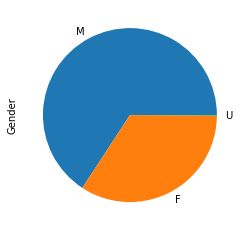

In [513]:
gender = md_violations.loc[:, 'Gender'].value_counts()
gender = pd.DataFrame(gender)
print(gender)
md_violations.Gender.value_counts().plot(kind='pie')

# Violations by Car Color
It's 'common knowledge' that red and yellow cars tend to be pulled over more often. This data allowed me to look into whether or not there is any evidence behind this claim, or whether cars of these colors commit more violations than cars of other colors. I lumped together any color that came in dark or light and put natural colors (gold, tan, brown, beige, and cream) in one category as the [data on car color statistics](https://detroit.cbslocal.com/2013/10/22/more-car-buyers-saying-color-me-blue/) I used had a 'natural color' category. I acknowledge that this is not ideal, but these colors made up such a small portion of the data that I don't believe it to be too impactful. Lastly, it is important to note that the data used for the car color statistics was for the entire United States and not just Maryland, so if Maryland is not representative of the country, the analysis will not be accurate.

While the pie chart below shows us the breakdown of number of violations by color, it's not particularly helpful as it's widely known that monochromatic-colored cars make up most of the market - therefore, it's safe to assume these cars will be responsible for more violations simply because there are more of them on the road. However, the bar chart below is broken into two portions - for each color, the bar on the left-hand side outlined in red represents the percentage of violations that color car is responsible for, and the bar on the right, outlined in black, represents the percentage of cars of that color on the roads. Therefore, if the bar on the left-hand side is larger than the bar on the right-hand, those drivers would be riskier to insure.

The bar chart clearly shows that drivers of silver and green cars are the riskiest, followed by natural-colored and black cars. We can see that drivers of white and gray cars are the safest to insure, followed closely by drivers of red cars. From the tiny portion of automobiles that yellow cars make up, we can see that those drivers do not contribute to violations at a rate higher than we would expect compared to the number of yellow cars on the road.


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


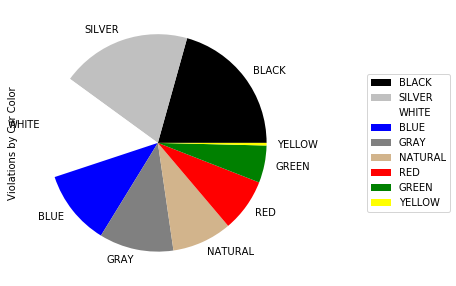

In [515]:
md_violations['Violations_per_Color'] = md_violations['Color'].replace('BLUE, DARK','BLUE').replace('BLUE, LIGHT','BLUE').replace('GREEN, LGT','GREEN').replace('GREEN, DK','GREEN').replace(['GOLD', 'TAN', 'MAROON', 'BEIGE', 'BROWN', 'CREAM'], 'NATURAL')
color = md_violations.loc[:, 'Violations_per_Color'].value_counts()
color = pd.DataFrame(color)
#print(color)
color = color.iloc[:9, :]
color['Percent_of_Color'] = [18.9, 14.9, 20.9, 8.9, 16.9, 6, 11, 2, 0.5]
color['Percent_by_Color'] = color['Violations_per_Color']/sum(color.iloc[:, 0]) * 100
color = pd.DataFrame(color)
#print(sum(color.iloc[:, 0]))
#print(color)


color.Violations_per_Color.plot(kind='pie', figsize=(20,5), subplots=True, colors=['black', 'silver', 'white', 'blue', 'gray', 'tan', 'red', 'green', 'yellow'])
plt.ylabel('Violations by Car Color')

plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))




According to [CBS Detroit](https://detroit.cbslocal.com/2013/10/22/more-car-buyers-saying-color-me-blue/), in 2013 
the most popular car colors in the US were as follows. Of course, it's possible that Maryland is not a good sample
of the population and this would skew our analysis. However, here we can see that drivers of white and gray cars
are quite safe for insurance companies to take on, whereas drivers of silver, natural colored, and especially green
cars are riskier.

//anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"
//anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


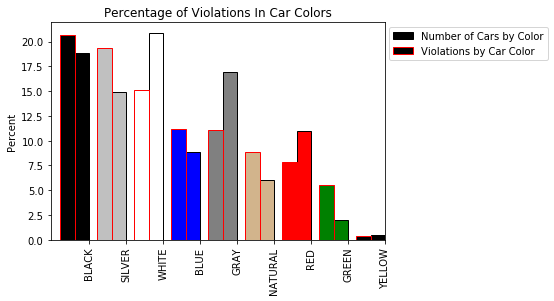

In [516]:
color.Percent_of_Color.plot(kind='bar', width=0.4, edgecolor='black', colors=['black', 'silver', 'white', 'blue', 'gray', 'tan', 'red', 'green'], position=1, label='Number of Cars by Color')
color.Percent_by_Color.plot(kind='bar', width=0.4, edgecolor='red', colors=['black', 'silver', 'white', 'blue', 'gray', 'tan', 'red', 'green'], position=2, label='Violations by Car Color')
plt.ylabel('Percent')
plt.title('Percentage of Violations In Car Colors')
plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right')
plt.show()

# Violations by Car Brand
Next, we look at breakdown of violations by car brand. I combined the car makes into the top twelve car brands as information on the statistics of the automobile market share were more available by car company as opposed to car make. It's important to note that the data I used from [The Truth About Cars](https://www.thetruthaboutcars.com/2015/07/chart-day-u-s-automaker-market-share-america-june-2015-ytd/) concerning market share, similar to the data for car colors, covers the entire United States and not just Maryland, so the analysis will not be accurate if Maryland is not representative of the country. 

The bar graph below shows the percentage of violations, shown in red, versus the percentage of market share, shown in green, of each car company. Drivers of cars from Toyota and Honda appear to have a higher percentage of car violations compared to the market share of these companies, and would therefore be riskier to insure, whereas drivers of General Motors, Nissan, Fiat Crysler, and Hyundai are safer.

In [517]:
md_violations = traffic_violations[traffic_violations.State =='MD']
# print(md_violations.columns)
# print(md_violations.shape)
md_violations['Car_Brand'] = md_violations['Make'].replace(['TOYT', 'LEXUS', 'LEXU', 'TOYOTA', 'SCION', 'TOYO', 'LEXS', 'TOYOT', 'TOY'],'TOYOTA MOTOR COMPANY').replace(['ACUR','ACURA','HOND', 'HONDA'],'HONDA MOTOR COMPANY').replace(['NISS', 'MITSUBISHI', 'MITS', 'NISSAN', 'INFI', 'INFINITI', 'INFINITY'], 'RENAULT-NISSAN-MITSUBISHI ALLIANCE').replace(['CHEV', 'CHEVROLET', 'CHEVY', 'BUICK', 'CADILLAC', 'GMC', 'CADI', 'SATURN','SATU', 'PONTIAC', 'PONT', 'BUIC'], 'GENERAL MOTORS').replace(['KIA', 'HYUN', 'HYUNDAI'], 'HYUNDAI MOTOR GROUP').replace(['VOLK', 'VOLKSWAGON', 'VW', 'AUDI', 'VOLKS', 'PORSCHE'], 'VOLKSWAGEN').replace(['MERZ', 'MERCEDES', 'SMART', 'MERCEDEZ'], 'DAIMLER').replace(['DODG', 'DODGE', 'FIAT', 'CHRYSLER', 'CHRY', 'JEEP'], 'FIAT CHRYSLER AUTOMOBILES' ).replace('MAZD', 'MAZDA').replace('SUBA', 'SUBARU').replace('MERC', 'MERCEDES').replace(['LINCOLN', 'FORD', 'MERCURY', 'LINC'], 'FORD MOTOR COMPANY').replace('VOLV', 'VOLVO').replace('MINI', 'BMW')
make = md_violations.loc[:, 'Car_Brand'].value_counts()
make = pd.DataFrame(make)
total_violations = make['Car_Brand'].sum()
print('Total violations: ', total_violations)
make['Percentage_of_Violations'] = make['Car_Brand']/total_violations * 100
make = make.iloc[:12, :]
make['Percentage_of_Market'] = [14.4, 8.8, 17.7, 15.1, 8.6, 12.8, 8.0, 3.5, 2.3, 2.1, 1.9, 3.2]



//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Total violations:  762268


In [518]:
#md_violations.Car_Brand.value_counts().head(10).plot(kind='bar', figsize=(12,5))
market_share = [['GENERAL MOTORS', 17.7], ['FORD MOTOR COMPANY', 15.1],
                                      ['TOYOTA MOTOR COMPANY', 14.4], ['FIAT CHRYSLER AUTOMOBILES', 12.8],
                                     ['HONDA MOTOR COMPANY', 8.8], ['RENAULT-NISSAN-MITSUBISHI ALLIANCE', 8.6], 
                                     ['HYUNDAI MOTOR GROUP', 8.0], ['VOLKSWAGEN', 3.5],
                                     ['SUBARU', 3.2], ['BMW', 2.3], ['DAIMLER', 2.1], 
                                     ['MAZDA', 1.9]]

#market_share = pd.DataFrame(market_share, columns=['Car_Brand', 'Percentage_of_Market'])
#print(market_share)

As we can see below, Toyota and Honda drivers not only have the highest number of violations, but are the riskiest
drivers as the percentage of violations is greater than the percentage of cars on the road. Drivers of General
Motors, Ford, Fiat Chrysler, and Hyundai vehicles are the safest bet for insurance companies. 
Unfortunately, I was only able to find market share data for the US and not specifically Maryland, so this analysis
could be skewed. If, for example, Toyota has a much larger share in Maryland compared to the rest of the US, Toyota
drivers would not be considered as risky.

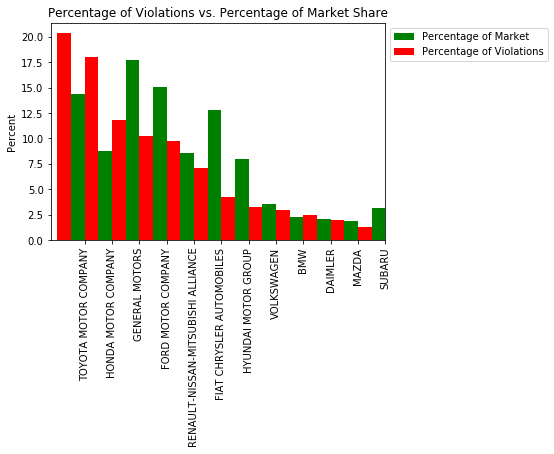

In [519]:
market = make.Percentage_of_Market.plot(kind='bar', color='green', position=1, label='Percentage of Market')
violations = make.Percentage_of_Violations.plot(kind='bar', color='red', position=2, label='Percentage of Violations')
plt.ylabel('Percent')
plt.title('Percentage of Violations vs. Percentage of Market Share')
plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right')
plt.show()

# Violations Over 2013-2015
Finally, I'll look at how the number of violations changes over the span of three years. The most obvious trend is an increase in the number of violations over the years. A number of things could contribute to this - people choosing to drive more often, a higher number of automobiles on the road, or authorities putting more emphasis on car citations.

While there doesn't seem to be a concrete trend over the months, it's clear that February has the fewest number of violations with that number increasing significantly as we move into Spring each year. Perhaps we can attribute lower numbers of violations in December, January, and February to dangerous weather - people tend to drive more carefully in snow and storms. 

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5, 1.0, 'Number of Violations Per Month Over 2013-2015')

<Figure size 432x288 with 0 Axes>

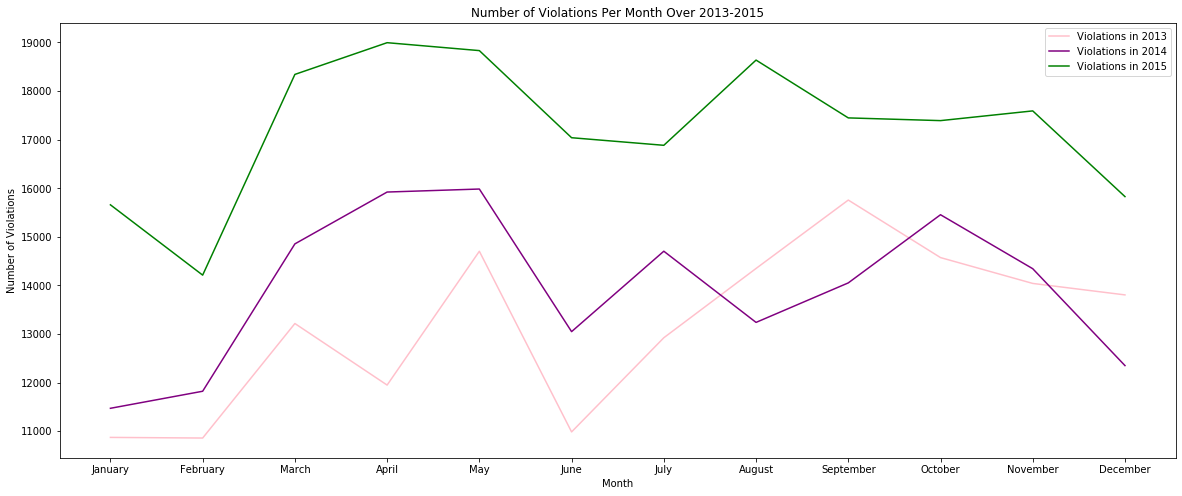

In [520]:
md_violations['Month'] = pd.DatetimeIndex(md_violations['Date']).month
md_violations['Month_string'] = md_violations['Month'].replace(1, 'January').replace(2, 'February').replace(3, 'March').replace(4, 'April').replace(5, 'May').replace(6, 'June').replace(7, 'July').replace(8, 'August').replace(9, 'September').replace(10, 'October').replace(11, 'November').replace(12, 'December')
#months = md_violations.loc[:, 'Month_string'].value_counts()
months_ordered = pd.DataFrame(np.array([['January', 15659], ['February', 14212], ['March', 18343], ['April', 18996], ['May', 18833], ['June', 17040],
                 ['July', 16884], ['August', 18638], ['September', 17448], ['October', 17392], ['November', 17592], ['December', 15828]]), columns=['Month', 'Number_of_Violations'])
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
violations_2015 = [15659, 14212, 18343, 18996, 18833, 17040, 16884, 18638, 17448, 17392, 17592, 15828]
violations_2014 = [11471, 11822, 14855, 15922, 15984, 13049, 14704, 13239, 14052, 15455, 14344, 12350]
violations_2013 = [10872, 10859, 13216, 11949, 14703, 10985, 12923, 14349, 15757, 14573, 14041, 13805]

fig = plt.figure()
plt.figure(figsize=(20,8))
plt.plot(months, violations_2013, color='pink', label='Violations in 2013')
plt.plot(violations_2014, color='purple', label='Violations in 2014')
plt.plot(violations_2015, color='green', label='Violations in 2015')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Number of Violations')
plt.title('Number of Violations Per Month Over 2013-2015')

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5, 1.0, 'Number of Violations Per Month Over 2013-2015')

<Figure size 432x288 with 0 Axes>

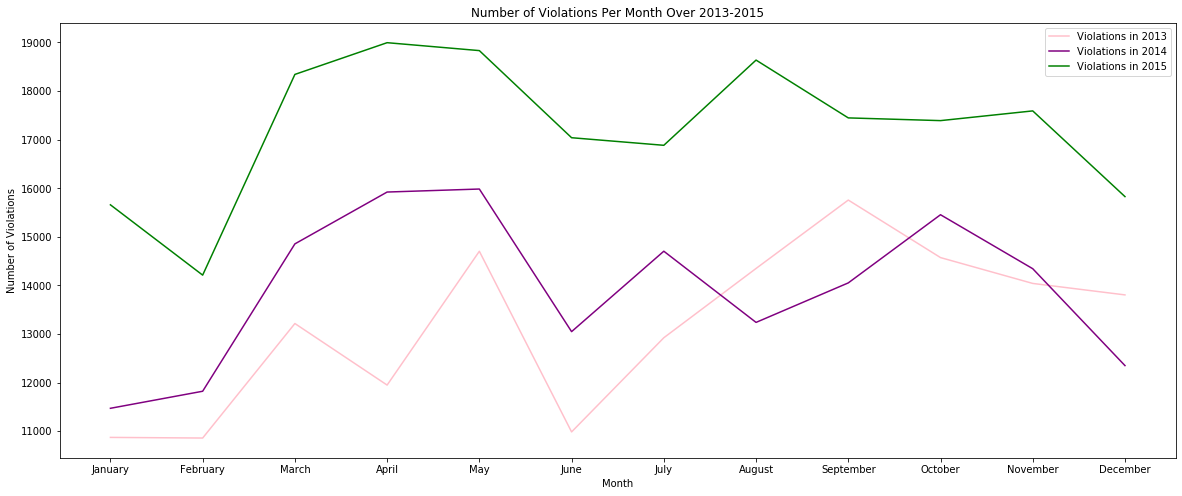

In [521]:
md_violations['Month'] = pd.DatetimeIndex(md_violations['Date']).month
md_violations['Month_string'] = md_violations['Month'].replace(1, 'January').replace(2, 'February').replace(3, 'March').replace(4, 'April').replace(5, 'May').replace(6, 'June').replace(7, 'July').replace(8, 'August').replace(9, 'September').replace(10, 'October').replace(11, 'November').replace(12, 'December')
#months = md_violations.loc[:, 'Month_string'].value_counts()
months_ordered = pd.DataFrame(np.array([['January', 15659], ['February', 14212], ['March', 18343], ['April', 18996], ['May', 18833], ['June', 17040],
                 ['July', 16884], ['August', 18638], ['September', 17448], ['October', 17392], ['November', 17592], ['December', 15828]]), columns=['Month', 'Number_of_Violations'])
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
violations_2015 = [15659, 14212, 18343, 18996, 18833, 17040, 16884, 18638, 17448, 17392, 17592, 15828]
violations_2014 = [11471, 11822, 14855, 15922, 15984, 13049, 14704, 13239, 14052, 15455, 14344, 12350]
violations_2013 = [10872, 10859, 13216, 11949, 14703, 10985, 12923, 14349, 15757, 14573, 14041, 13805]

fig = plt.figure()
plt.figure(figsize=(20,8))
plt.plot(months, violations_2013, color='pink', label='Violations in 2013')
plt.plot(violations_2014, color='purple', label='Violations in 2014')
plt.plot(violations_2015, color='green', label='Violations in 2015')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Number of Violations')
plt.title('Number of Violations Per Month Over 2013-2015')

# Summary

Assuming the car color and market share statistics for the US are representative of the state of Maryland, we are able to make some interesting conclusions from this data. Males are definitively riskier drivers than females, drivers of black and silver cars are riskier than drivers of cars of other colors, and drivers of Toyotas and Hondas are significantly riskier than those of other brands. The number of violations is increasing steadily over the years with a clear peak in the spring of each year.
As far as further research goes, I'd love to look into how age factors into risk. I'd like to use similar techniques to create the profiles of the riskiest and safest drivers to insure, and potentially analyze the most dangerous intersections to live near in Maryland. I originally started this project with the intention of looking at the US as a whole and would still like compare the number of violations in different states/regions of the country. I'd also like to learn how to predict the pattern and increase of violations over the next years (2016-2019) and compare that to the actual data.